# EXPLORATORY DATA ANALYSIS

In [5]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from helpers import data_preparation
from scipy import stats

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
df = pd.read_csv('datasets/database-1701392111.8423762.csv')

In [7]:
df.head()

,Unnamed: 0,URL,Fabricante,Modelo,Versao,Valor,Cidade,Ano,Combustível,Placa final,...,Lanternas traseiras de led,Sensor crepuscular,Banco do passageiro com ajuste elétrico,Veículo alienado,Bancos dianteiros com aquecimento,Pneus de uso off-road,Park assist paralelo,Calha de chuva,Freio a disco dianteiro,Ar quente (ar-condicionado)
0,0,https://www.mobiauto.com.br/comprar/carros/ba-...,Toyota,Hilux SW4,SRV 4x4 3.0 Turbo (aut)2,R$ 79.900,Lauro de Freitas - BA,2009/2009,Diesel,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,https://www.mobiauto.com.br/comprar/carros/ba-...,Volkswagen,T-Cross,1.0 200 TSI Comfortline (Aut) (Flex),R$ 110.900,Salvador - BA,2021/2022,Flex,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,https://www.mobiauto.com.br/comprar/carros/ba-...,Volkswagen,T-Cross,1.0 200 TSI Comfortline (Aut) (Flex),R$ 107.000,Salvador - BA,2021/2022,Flex,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,https://www.mobiauto.com.br/comprar/carros/ba-...,Volkswagen,Taos,Highline 1.4 TSI (Aut) (Flex),R$ 164.900,Salvador - BA,2021/2022,Flex,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,https://www.mobiauto.com.br/comprar/carros/ba-...,Volkswagen,T-Cross,1.0 200 TSI Comfortline (Aut) (Flex),R$ 112.900,Salvador - BA,2021/2022,Flex,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#df2 = data_preparation(df)

In [12]:
df2 = pd.read_csv('datasets/database_cleaned.csv')

In [13]:
df2.head()

,Fabricante,Modelo,Versao,Valor,Cidade,Combustível,KM,Câmbio,Cor,Carroceria,...,Sensor crepuscular,Banco do passageiro com ajuste elétrico,Veículo alienado,Bancos dianteiros com aquecimento,Pneus de uso off-road,Park assist paralelo,Calha de chuva,Freio a disco dianteiro,Ar quente (ar-condicionado),Model year
0,Toyota,Hilux SW4,SRV 4x4 3.0 Turbo (aut)2,79900,Lauro de Freitas - BA,Diesel,270000,Automática,Prata,SUV,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,2009
1,Volkswagen,T-Cross,1.0 200 TSI Comfortline (Aut) (Flex),110900,Salvador - BA,Flex,30016,Automática,Prata,SUV,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,2022
2,Volkswagen,T-Cross,1.0 200 TSI Comfortline (Aut) (Flex),107000,Salvador - BA,Flex,3617,Automática,Branco,SUV,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,2022
3,Volkswagen,Taos,Highline 1.4 TSI (Aut) (Flex),164900,Salvador - BA,Flex,23608,Automática,Azul,Não,...,Sim,Não,Não,Não,Não,Não,Não,Não,Não,2022
4,Volkswagen,T-Cross,1.0 200 TSI Comfortline (Aut) (Flex),112900,Salvador - BA,Flex,7972,Automática,Branco,SUV,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,2022


In [14]:
df2.isnull().sum().sum()

0

In [15]:
num_variables = df2.select_dtypes(['int64']).columns.tolist()
num_variables

['Valor', 'KM', 'Model year']

In [16]:
cat_variables = df2.select_dtypes('object').columns.tolist()
cat_variables

['Fabricante',
 'Modelo',
 'Versao',
 'Cidade',
 'Combustível',
 'Câmbio',
 'Cor',
 'Carroceria',
 'Airbag motorista',
 'Ar-condicionado',
 'Direção hidráulica',
 'Vidros elétricos dianteiros',
 'Travas elétricas',
 'Retrovisores elétricos',
 'Alarme',
 'Freios abs',
 'Bancos de couro',
 'Airbag duplo frontal',
 'Limpador traseiro',
 'Desembaçador traseiro',
 'Câmbio automático',
 'Rodas de liga leve',
 'Tração 4x4',
 'Ar quente',
 'Airbags laterais',
 'Vidros elétricos traseiros',
 'Banco do motorista com regulagem de altura',
 'Ajuste elétrico dos retrovisores',
 'Adaptado para pcd',
 'Sensor de estacionamento dianteiro',
 'Direção elétrica',
 'Kit visibilidade',
 'Sensor de estacionamento traseiro',
 'Aceita troca',
 'Ipva pago',
 'Motorização',
 'Potência (cv)',
 'Torque (kgf.m)',
 'Velocidade máxima (km/h)',
 'Tempo 0-100 (s)',
 'Consumo cidade (km/l)',
 'Consumo estrada (km/l)',
 'Tração',
 'Direção',
 'Suspensão dianteira',
 'Suspensão traseira',
 'Freios dianteiros',
 'Freios t

In [17]:
corr = df2[num_variables].corr()
corr

,Valor,KM,Model year
Valor,1.000000,-0.146823,0.309554
KM,-0.146823,1.000000,-0.522554
Model year,0.309554,-0.522554,1.000000


<Axes: >

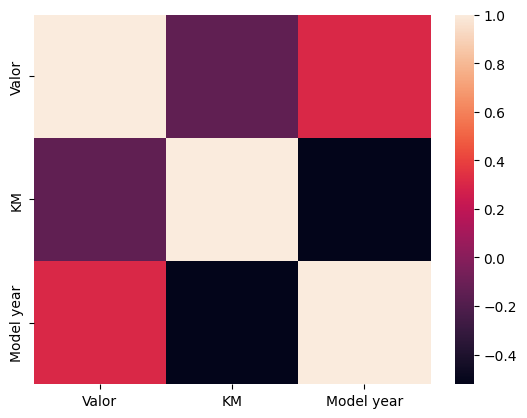

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(corr)

In [19]:
df2['KM']

0       270000
1        30016
2         3617
3        23608
4         7972
         ...  
3190     65456
3191         1
3192     45660
3193     20000
3194     63000
Name: KM, Length: 3195, dtype: int64

In [20]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

df2.drop(df2[df2['KM'] > 1000000].index, inplace=True)
X = df2.drop('Valor', axis=1)
y = df2['Valor']

In [121]:
num_variables = X.select_dtypes(['int64']).columns.tolist()
cat_variables = X.select_dtypes('object').columns.tolist()

X[cat_variables] = X[cat_variables].astype(str)

ct = ColumnTransformer([('num', StandardScaler(), num_variables),
                        ('cat', OneHotEncoder(drop='first'), cat_variables)])

X_trans = ct.fit_transform(X)

In [22]:
X_trans.shape

(3195, 6029)

In [24]:
X_trans.toarray().shape

(3195, 6029)

In [122]:
num_columns = ct.named_transformers_['num'].get_feature_names_out().tolist()
cat_columns = ct.named_transformers_['cat'].get_feature_names_out().tolist()

In [123]:
num_columns+cat_columns

['KM',
 'Model year',
 'Fabricante_BMW',
 'Fabricante_CAOA Chery',
 'Fabricante_Chevrolet',
 'Fabricante_Chrysler',
 'Fabricante_Citroën',
 'Fabricante_Dodge',
 'Fabricante_Effa',
 'Fabricante_Fiat',
 'Fabricante_Ford',
 'Fabricante_Honda',
 'Fabricante_Hyundai',
 'Fabricante_JAC',
 'Fabricante_Jaguar',
 'Fabricante_Jeep',
 'Fabricante_Kia',
 'Fabricante_Land Rover',
 'Fabricante_Lexus',
 'Fabricante_Lifan',
 'Fabricante_MINI',
 'Fabricante_Mercedes-Benz',
 'Fabricante_Mitsubishi',
 'Fabricante_Nissan',
 'Fabricante_Peugeot',
 'Fabricante_Porsche',
 'Fabricante_RAM',
 'Fabricante_Renault',
 'Fabricante_SsangYong',
 'Fabricante_Suzuki',
 'Fabricante_Toyota',
 'Fabricante_Troller',
 'Fabricante_Volkswagen',
 'Fabricante_Volvo',
 'Modelo_125i',
 'Modelo_2008',
 'Modelo_207',
 'Modelo_207 Sedan',
 'Modelo_208',
 'Modelo_2500',
 'Modelo_3008',
 'Modelo_300C',
 'Modelo_308',
 'Modelo_320i',
 'Modelo_3500',
 'Modelo_408',
 'Modelo_430i Cabriolet',
 'Modelo_500',
 'Modelo_5008',
 'Modelo_500e'

In [124]:
X_trans = pd.DataFrame(X_trans.toarray(), columns=(num_columns+cat_columns))
X_trans

,KM,Model year,Fabricante_BMW,Fabricante_CAOA Chery,Fabricante_Chevrolet,Fabricante_Chrysler,Fabricante_Citroën,Fabricante_Dodge,Fabricante_Effa,Fabricante_Fiat,...,Lanternas traseiras de led_Sim,Sensor crepuscular_Sim,Banco do passageiro com ajuste elétrico_Sim,Veículo alienado_Sim,Bancos dianteiros com aquecimento_Sim,Pneus de uso off-road_Sim,Park assist paralelo_Sim,Calha de chuva_Sim,Freio a disco dianteiro_Sim,Ar quente (ar-condicionado)_Sim
0,4.916245,-2.837936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.584897,1.001597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.190040,1.001597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.731787,1.001597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.090210,1.001597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,0.227493,0.706248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3191,-1.272929,-1.361192,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3192,-0.226290,-1.065844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3193,-0.814493,-0.770495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: xlabel='KM', ylabel='Count'>

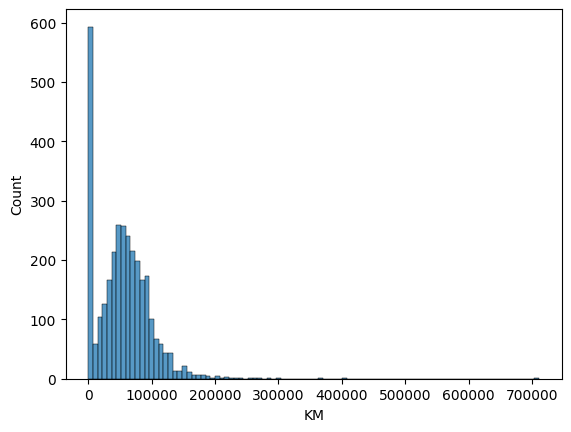

In [29]:
sns.histplot(X['KM'])

<Axes: xlabel='Valor', ylabel='Count'>

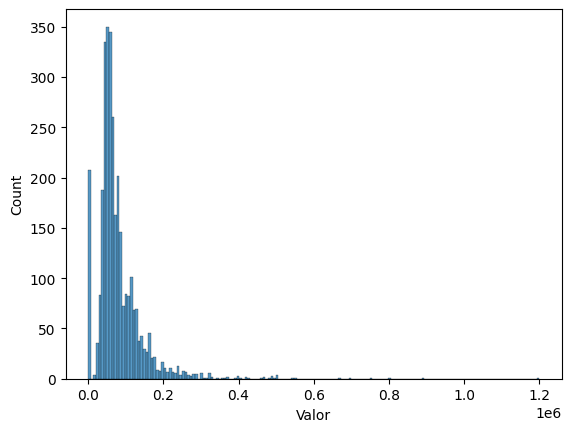

In [106]:
sns.histplot(y)

In [30]:
X_trans.iloc[:,2:]

,Fabricante_Audi,Fabricante_BMW,Fabricante_CAOA Chery,Fabricante_Chevrolet,Fabricante_Chrysler,Fabricante_Citroën,Fabricante_Dodge,Fabricante_Effa,Fabricante_Fiat,Fabricante_Ford,...,Pneus de uso off-road_Não,Pneus de uso off-road_Sim,Park assist paralelo_Não,Park assist paralelo_Sim,Calha de chuva_Não,Calha de chuva_Sim,Freio a disco dianteiro_Não,Freio a disco dianteiro_Sim,Ar quente (ar-condicionado)_Não,Ar quente (ar-condicionado)_Sim
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3191,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [125]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=(.8*(1-.8)))

X_sel = sel.fit_transform(X_trans.iloc[:,2:])
X_sel

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.]])

In [126]:
X_sel.shape

(3195, 57)

In [127]:
X_trans.iloc[:,:2].columns.tolist()+['a']

['KM', 'Model year', 'a']

In [128]:
X_sel2 = np.concatenate((X_trans.iloc[:,:2].values, X_sel), axis=1)

In [129]:
X_sel2

array([[ 4.91624477, -2.83793562,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.58489666,  1.00159715,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [-1.19003964,  1.00159715,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.22629002, -1.06584357,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.81449294, -0.7704949 ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.17119395, -1.36119225,  1.        , ...,  0.        ,
         0.        ,  0.        ]])

In [130]:
sel2_columns = X_trans.iloc[:,:2].columns.tolist()+sel.get_feature_names_out().tolist()

In [131]:
sel2_columns

['KM',
 'Model year',
 'Câmbio_Automática',
 'Câmbio_Manual',
 'Cor_Branco',
 'Carroceria_Hatch',
 'Carroceria_SUV',
 'Direção hidráulica_Sim',
 'Retrovisores elétricos_Sim',
 'Alarme_Sim',
 'Bancos de couro_Sim',
 'Limpador traseiro_Sim',
 'Câmbio automático_Sim',
 'Rodas de liga leve_Sim',
 'Ar quente_Sim',
 'Airbags laterais_Sim',
 'Vidros elétricos traseiros_Sim',
 'Banco do motorista com regulagem de altura_Sim',
 'Ajuste elétrico dos retrovisores_Sim',
 'Sensor de estacionamento dianteiro_Sim',
 'Direção elétrica_Sim',
 'Sensor de estacionamento traseiro_Sim',
 'Aceita troca_Sim',
 'Ipva pago_Sim',
 'Motorização_1.0',
 'Velocidade máxima (km/h)_N/C',
 'Tração_Dianteira',
 'Tração_dianteira',
 'Direção_Elétrica',
 'Direção_Não',
 'Suspensão dianteira_Suspensão tipo McPherson e dianteira com barra estabilizadora, roda tipo independente e molas helicoidal.',
 'Suspensão traseira_Suspensão tipo eixo de torção, roda tipo semi-independente e molas helicoidal.',
 'Freios dianteiros_Dois

In [37]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(max_depth=5)
rf_model.fit(X_sel2, y)

RandomForestRegressor(max_depth=5)

In [38]:
y_pred = rf_model.predict(X_sel2)

In [39]:
rf_model.score(X_sel2, y)

0.6071118695944144

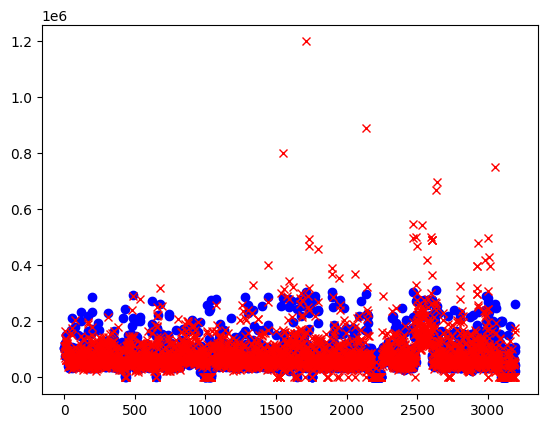

In [40]:
import matplotlib.pyplot as plt

plt.plot(range(len(y_pred)), y_pred, 'bo')
plt.plot(range(len(y_pred)), y, 'rx')

In [70]:
sorted(zip(rf_model.feature_importances_,sel2_columns),reverse=True)

[(0.21301664150811012, 'Câmbio_Manual'),
 (0.20218815725589345, 'Tração_dianteira'),
 (0.18809772489912716, 'KM'),
 (0.10538517239686868, 'Model year'),
 (0.10320531773944702, 'Tração_Dianteira'),
 (0.0930814592876604, 'Câmbio_Automática'),
 (0.013034026824113759, 'Carroceria_Hatch'),
 (0.009575181060886031, 'Direção hidráulica_Sim'),
 (0.007122122221952379,
  'Freios dianteiros_Dois freios à disco com dois discos ventilados.'),
 (0.0068008880797365895, 'Direção hidráulica_Não'),
 (0.003372667604437072, 'Cd player com mp3_Sim'),
 (0.003292977052499597, 'Bancos de couro_Não'),
 (0.0029050596605360475, 'Rodas de liga leve_Não'),
 (0.0028342898875859503, 'Cd player com mp3_Não'),
 (0.002779737860599972, 'Baixa quilometragem_Não'),
 (0.002632215761597892, 'Câmbio automático_Não'),
 (0.002385167816621165, 'Baixa quilometragem_Sim'),
 (0.0023831048258068075, 'Rodas de liga leve_Sim'),
 (0.0022732246705832785, 'Bancos de couro_Sim'),
 (0.002025135276559947, 'Airbags laterais_Não'),
 (0.001957

In [132]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_sel2, y)

LinearRegression()

In [133]:
lr.score(X_sel2, y)

0.4588187974834348

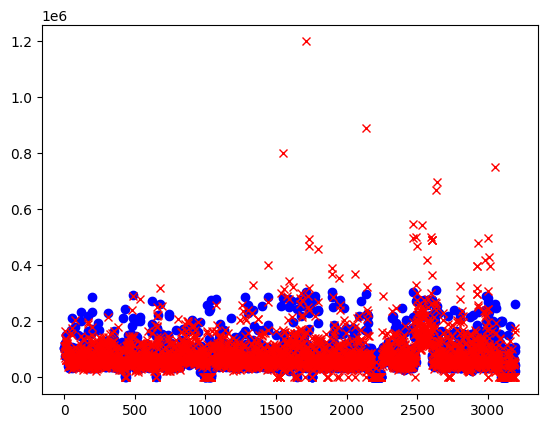

In [134]:
y_pred2 = lr.predict(X_sel2)
plt.plot(range(len(y_pred)), y_pred, 'bo')
plt.plot(range(len(y_pred)), y, 'rx')

In [135]:
sorted(zip(lr.coef_,sel2_columns),reverse=True)

[(20337.69038592459, 'Model year'),
 (12399.394873287582, 'Baixa quilometragem_Sim'),
 (11777.82391588641, 'Controle de tração_Sim'),
 (11069.039899198859, 'Carroceria_SUV'),
 (10764.033569204192, 'Sensor de chuva_Sim'),
 (9945.39366353507,
  'Freios dianteiros_Dois freios à disco com dois discos ventilados.'),
 (8698.443073867853, 'Pronta entrega_Sim'),
 (8225.199993558266, 'Câmbio_Automática'),
 (6584.124404725679, 'Bancos de couro_Sim'),
 (5835.386564307468, 'Ajuste elétrico dos retrovisores_Sim'),
 (5666.732576463557, 'Sensor de estacionamento dianteiro_Sim'),
 (5462.279780750542, 'Cd player_Sim'),
 (5408.856256722871, 'Cd player com mp3_Sim'),
 (5217.448118423663, 'Bluetooth_Sim'),
 (4214.778118479777, 'Entradas usb_Sim'),
 (3698.9157022401705, 'Central multimídia_Sim'),
 (3126.42619982456, 'Alarme_Sim'),
 (2787.250556594412, 'Airbags laterais_Sim'),
 (2147.7432447231695, 'Volante com regulagem de altura_Sim'),
 (2074.9888296713852, 'Laudo cautelar aprovado_Sim'),
 (1391.152908352

In [136]:
df2.groupby('Câmbio')['Valor'].mean()

Airbag de joelho
Automatizado              78234.736842
Automática               112989.434548
Automática Sequencial     85185.000000
CVT                       84635.051948
Manual                    51876.018645
Name: Valor, dtype: float64

/home/estacio/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 0, 'KM')

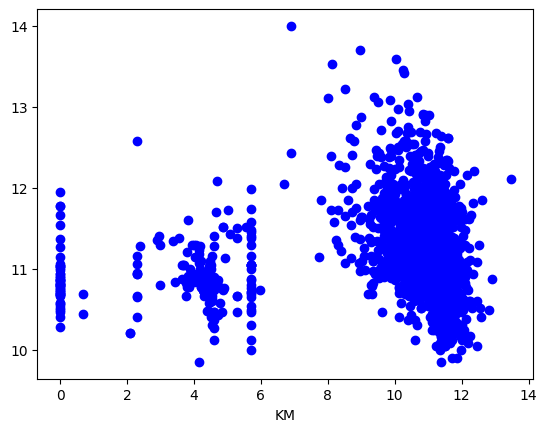

In [151]:
fig, ax = plt.subplots()
ax.plot(np.log(df2['KM']), np.log(df2['Valor']), 'bo')
ax.set_xlabel('KM')

In [142]:
range(len(df))

range(0, 3200)